# Matplolib
Documentation : https://matplotlib.org/

#### Sommaire :
* [1](#1) : Les bases de Matplolib
    * [1.1](#1.1) : Graphiques simples
    * [1.2](#1.2) : Styles graphiques
    * [1.3](#1.3) : cycle de vie d'une figure
    * [1.4](#1.4) : Subplots
    * [1.5](#1.5): Méthode orienté objet 
* [2](#2) : Notions plus avancées
    * [2.1](#2.1) : grid
* [3](#3) : Grapiques importants
    * [3.1](#3.1) : Graphique de Classification avec Scatter() 
    * [3.2](#3.2) : Graphiques 3D
    * [3.3](#3.3) : Histogrammes
    * [3.4](#3.4) : Graphiques ContourPlot()
    * [3.5](#3.5) : Imshow()
    * [3.6](#3.6) : Champ de vecteur

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Les bases de Matplotlib <a class="anchor" id="1"></a>
### 1.1. Graphiques simples <a class="anchor" id="1.1"></a>
* **plt.plot(x, y)** : trace y en fonction de x
* **plt.scatter(x, y)** : nuage de point de y en fonction de x

<class 'numpy.ndarray'>


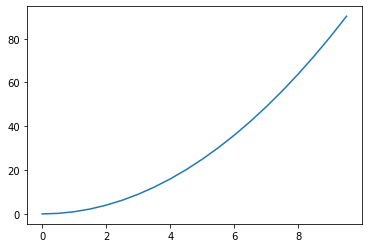

In [2]:
x = np.arange(0, 10, 0.5)
y = x**2

print(type(y))
plt.plot(x, y)
plt.show()

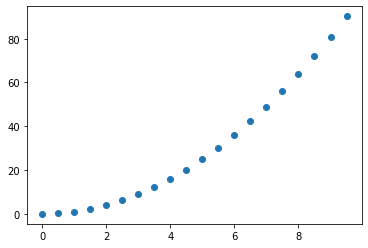

In [3]:
plt.scatter(x, y)
plt.show()

### 1.2. Styles graphiques <a class="anchor" id="1.2"></a>
Argument pour personnaliser les courbes :
* **c** : couleur de la ligne
* **lw** : epaisseur de la ligne (pour les graphiques plot)
* **ls** : style de la ligne (pour les graphiques plot)
* **s** : taille du point (pour les graphiques scatter)
* **marker** : style de points (pour les graphiques scatter)
* **alpha** : transparence du graphique

Méthodes pour personnaliser les figures :
* **plt.title**() : ajouter un titre
* **plt.xlabel**() : ajouter une légende en x
* **plt.ylabel**() : ajouter une légende en y
* **plt.legend**() : ajouter des légendes aux courbes, en ayant défini dans celle-ci un argument **label**
* **plt.colorbar**() : ajoute une colorbar

### 1.3. Cycle de vie d'une figure <a class="anchor" id="1.3"></a>
Pour créer une figure de manière correcte, il faut suivre cette ordre :
1. **plt.figure**(figsize())
2. **plt.plot**()
3. Extras (titre, axes, legendes)
4. **plt.show**()

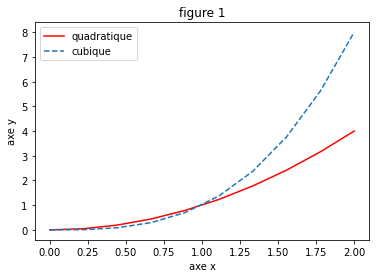

In [4]:
X = np.linspace(0, 2, 10)

plt.figure(figsize=[6, 4]) # Création d'une figure
plt.plot(X, X**2, label='quadratique', c="red") # premiere courbe
plt.plot(X, X**3, label='cubique', ls="--") # deuxieme courbe
# Extra information
plt.title('figure 1') # titre
plt.xlabel('axe x') # axes
plt.ylabel('axe y') # axes
plt.legend() # legend

plt.savefig('figure.png') # sauvegarde la figure dans le repertoire de travail
plt.show() # affiche la figure

### 1.4. Subplots <a class="anchor" id="1.4"></a>
Les subplots sont une manière simple de positionner plusieurs graphiques dans une même figure.
* **plt.subplot**(nombre de ligne, nombre de colonne, position dans la grille)

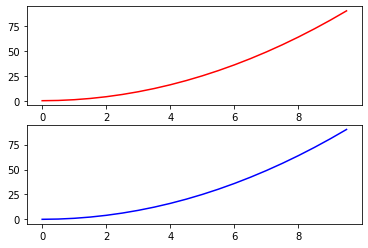

In [5]:
plt.subplot(2, 1, 1)
plt.plot(x, y, c='red')
plt.subplot(2, 1, 2)
plt.plot(x, y, c='blue')
plt.show()

### 1.5. Méthode orienté objet <a class="anchor" id="1.4"></a>
La méthode orientée objet est une façon plus puissante, mais plus compliqué, de créer des figures

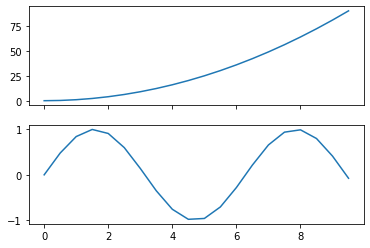

In [6]:
fig, ax = plt.subplots(2, 1, sharex=True) # partage le meme axe pour les subplots
ax[0].plot(x, y)
ax[1].plot(x, np.sin(x))
plt.show()

# 2. Notions plus avancées <a class="anchor" id="2"></a>
### 2.1. Subplot2grid <a class="anchor" id="1.1"></a>
La méthode **plt.subplot2grid**() permet de positionner des graphiques dans une grille, avec plus de contrôle que la méthode **plt.subplot**().
* **plt.subplot2grid**((nombre de ligne, nombre de colonne), (position ligne, position colonne))
    * **colspan=** : indique sur combien de colonne peut s'étendre le graphique
    * **rowspan=** : indique sur combien de ligne peut s'é'tendre le graphique
* **plt.tight_layout**() : permet de séparer proprement les graphiques d'une même figure

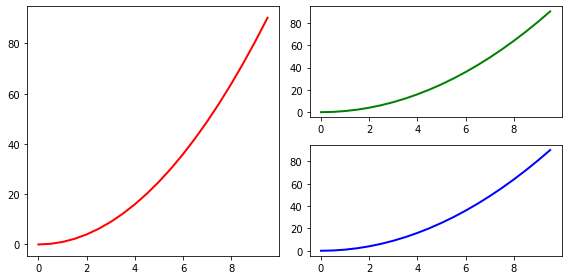

In [7]:
plt.figure(figsize=(8, 4)) # Création d'une figure
plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=2)
plt.plot(x, x**2, color="red", linewidth=2)
plt.subplot2grid((2, 4), (0, 2), colspan=2)
plt.plot(x, y, color="green", linewidth=2, )
plt.subplot2grid((2, 4), (1, 2), colspan=2)
plt.plot(x, y, color="blue", linewidth=2)
plt.tight_layout() # Crée une marge entre les graphique de la figure
plt.show() # Affiche la figure

# 3. Graphiques importants <a class="anchor" id="3"></a>
### 3.1. Graphique de Classification avec Scatter() <a class="anchor" id="3.1"></a>
* **plt.scatter()** : permet de représenter les variables d'un jeux de données les unes en fonction des autres.

In [8]:
from sklearn.datasets import load_iris # importation d'un jeux de données

iris = load_iris() # chargement d'un jeux de données 
x = iris.data # échantillons et variables 
y = iris.target # classes des échantillons

print(f"x contient {x.shape[0]} échantillons et {x.shape[1]} variables")
print(f"y contient {np.unique(y).size} classes")

x contient 150 échantillons et 4 variables
y contient 3 classes


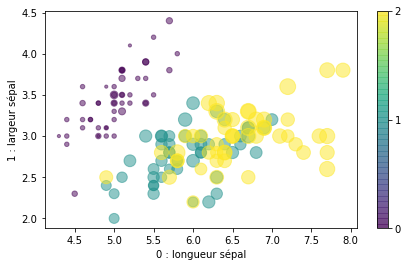

In [9]:
plt.figure(figsize=(7, 4)) # Création de la figure
plt.scatter(x[:, 0], x[:, 1], c=y, s=x[:, 3]*100, alpha=0.5) # On représente la variable 0 en fonction de la variable 1 :
                                                             # c=y attribut une couleur à chaque classe
                                                             # s permet d'ajuster la taille des points selon la variable 3
plt.xlabel("0 : longueur sépal")
plt.ylabel("1 : largeur sépal")
plt.colorbar(ticks=list(np.unique(y))) # Ajoute une colorbar
plt.show() # Affichage de la figure

### 3.2. Graphiques 3D <a class="anchor" id="3.2"></a>
Pour réaliser des graphiques 3D il faut importer le package suivant :

In [10]:
from mpl_toolkits.mplot3d import Axes3D

#### 3.2.1. Nuage de points 3D
Pour travailler avec de tel graphique, il faut obligatoirement passer par la programmation objet. On commence par créer un object **ax** grâce à la méthode **plt.axes**(projection="3d").
* **ax.scatter**() : Permet de tracer un nuage de point en 3D.

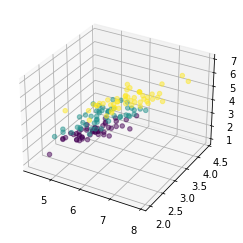

In [19]:
ax = plt.axes(projection="3d") # Création d'un object 3D
ax.scatter(x[:,0], x[:,1], x[:,2], c=y, s=20, alpha =0.5) # scatter avec 3 dimensions 
plt.show()

#### 3.2.2. Surface 3D
* **ax.plot_surfaces**(X, Y, Z) : permet de traver une surface en 3D. **X** et **Y** sont deux vecteur permettant de créer une grille, et **Z** est une fonction.
    * **cmap=** permet de colorer la surface. Documentation : https://matplotlib.org/stable/tutorials/colors/colormaps.html

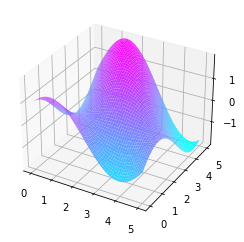

In [71]:
f = lambda x, y: np.sin(x) + np.cos(x+y)

X, Y = np.meshgrid(np.linspace(0, 5, 50), np.linspace(0, 5, 50)) # créer un maillage pour obtenir des points
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='cool')
plt.show()

### 3.3. Histogrammes <a class="anchor" id="3.3"></a>
* **plt.hist**() : permet de représenter la distribution de données
    * **bins=** : nombre de barres
* **plt.hist2d**() : permet de représenter la distribution de données selon 2 axes

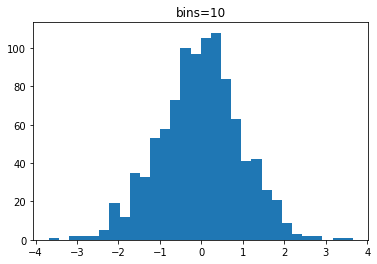

In [105]:
x = np.random.randn(1000)

plt.hist(x, bins=30)
plt.title('bins=10')
plt.show()

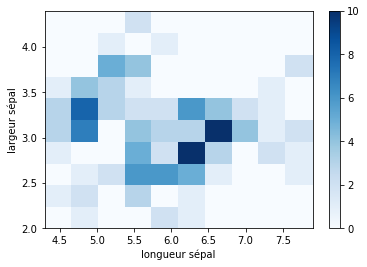

In [68]:
x = iris.data

plt.hist2d(x[:,0], x[:,1], cmap='Blues')
plt.xlabel('longueur sépal')
plt.ylabel('largeur sépal')
plt.colorbar()
plt.show()

### 3.4. Graphiques ContourPlot() <a class="anchor" id="3.4"></a>
* **plt.contour**(X, Y, Z, [nombre de pas], colors=) : Represente un modèle 3D en vue du dessus, discret
* **plt.contourf**(X, Y, Z, [nombre de pas], cmap=) : Represente un modèle 3D en vue du dessus, continue 

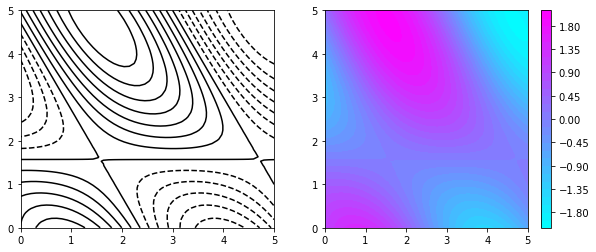

In [100]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.contour(X, Y, Z, 15, colors="black")
plt.subplot(1, 2, 2)
plt.contourf(X, Y, Z, 30, cmap="cool")
plt.colorbar()
plt.show()

### 3.5. Imshow() <a class="anchor" id="3.5"></a>
* **plt.imshow()** : Affiche une image ou un tableau numpy. Permet par exemple de créer des tableaux de corrélation

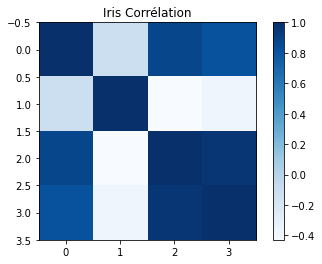

In [113]:
x = iris.data
plt.imshow(np.corrcoef(x.T), cmap="Blues")  # On affiche la matrice de corrélation entre les colonnes de x.
plt.colorbar()
plt.title('Iris Corrélation')
plt.show()

### 3.6. Champ de vecteur <a class="anchor" id="3.6"></a>
* **plt.quiver**([X, Y], U, V, [C]) : permet de créer un champ de vecteur. **X** et **Y** (optionels) définissent la position des vecteurs, **U** et **V** leur direction. L'argument **C** (optionel) permet de choisir une couleur.

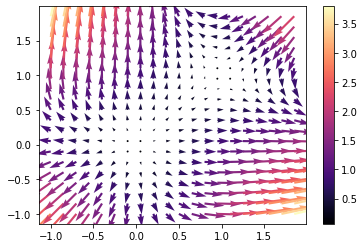

In [120]:
X, Y = np.meshgrid(np.arange(-1, 2, 0.15), np.arange(-1, 2, 0.15)) # créer un maillage pour positionner les vecteurs
U = X - X * Y # équation de U
V = -X * Y + Y # équation de V
C = np.hypot(U, V) # color map selon la taille des flèches.
plt.quiver(X, Y, U, V, C, width=0.008, scale=20, cmap="magma")
plt.colorbar()
plt.show()